In [5]:
# 1. Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Seaborn style
sns.set(style="whitegrid")

# 2. Load the Dataset
df = pd.read_csv('Ceramic-Concrete-Dataset.csv')
print(" First 5 Rows:\n", df.head())
print("\n Shape of Data:", df.shape)

 First 5 Rows:
    Cement  CeramicWastePowder  FineAggregate  CoarseAggregate   Water  \
0  528.03                 0.0         497.17          1302.63  200.64   
1  665.95                 0.0         250.19          1274.08  253.08   
2  464.68                 0.0         531.29          1151.07  271.22   
3  572.54                 0.0         588.52          1071.99  228.61   
4  512.83                 0.0         538.46          1123.09  225.17   

   CompressiveStrength  
0                33.67  
1                34.35  
2                26.77  
3                30.70  
4                26.23  

 Shape of Data: (60, 6)



 Missing Values:

Cement                 0
CeramicWastePowder     0
FineAggregate          0
CoarseAggregate        0
Water                  0
CompressiveStrength    0
dtype: int64

 Summary Statistics:

           Cement  CeramicWastePowder  FineAggregate  CoarseAggregate  \
count   60.000000           60.000000      60.000000        60.000000   
mean   449.906333           49.651167     586.258833      1154.317833   
std     74.093310           41.438531     100.599306       118.160601   
min    309.470000            0.000000     244.990000       949.750000   
25%    392.532500            0.000000     551.087500      1050.632500   
50%    444.925000           49.430000     584.130000      1149.985000   
75%    500.370000           88.040000     655.252500      1248.022500   
max    665.950000          130.410000     729.750000      1367.410000   

            Water  CompressiveStrength  
count   60.000000            60.000000  
mean   212.196833            27.580833  
std     30.134

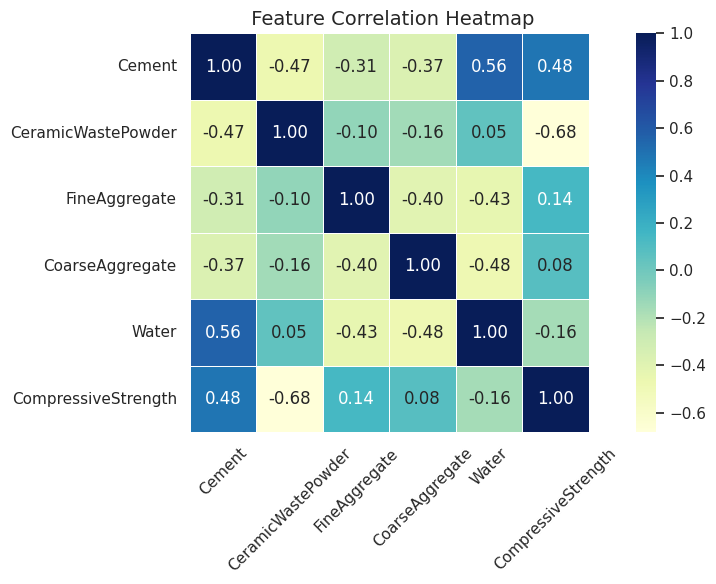

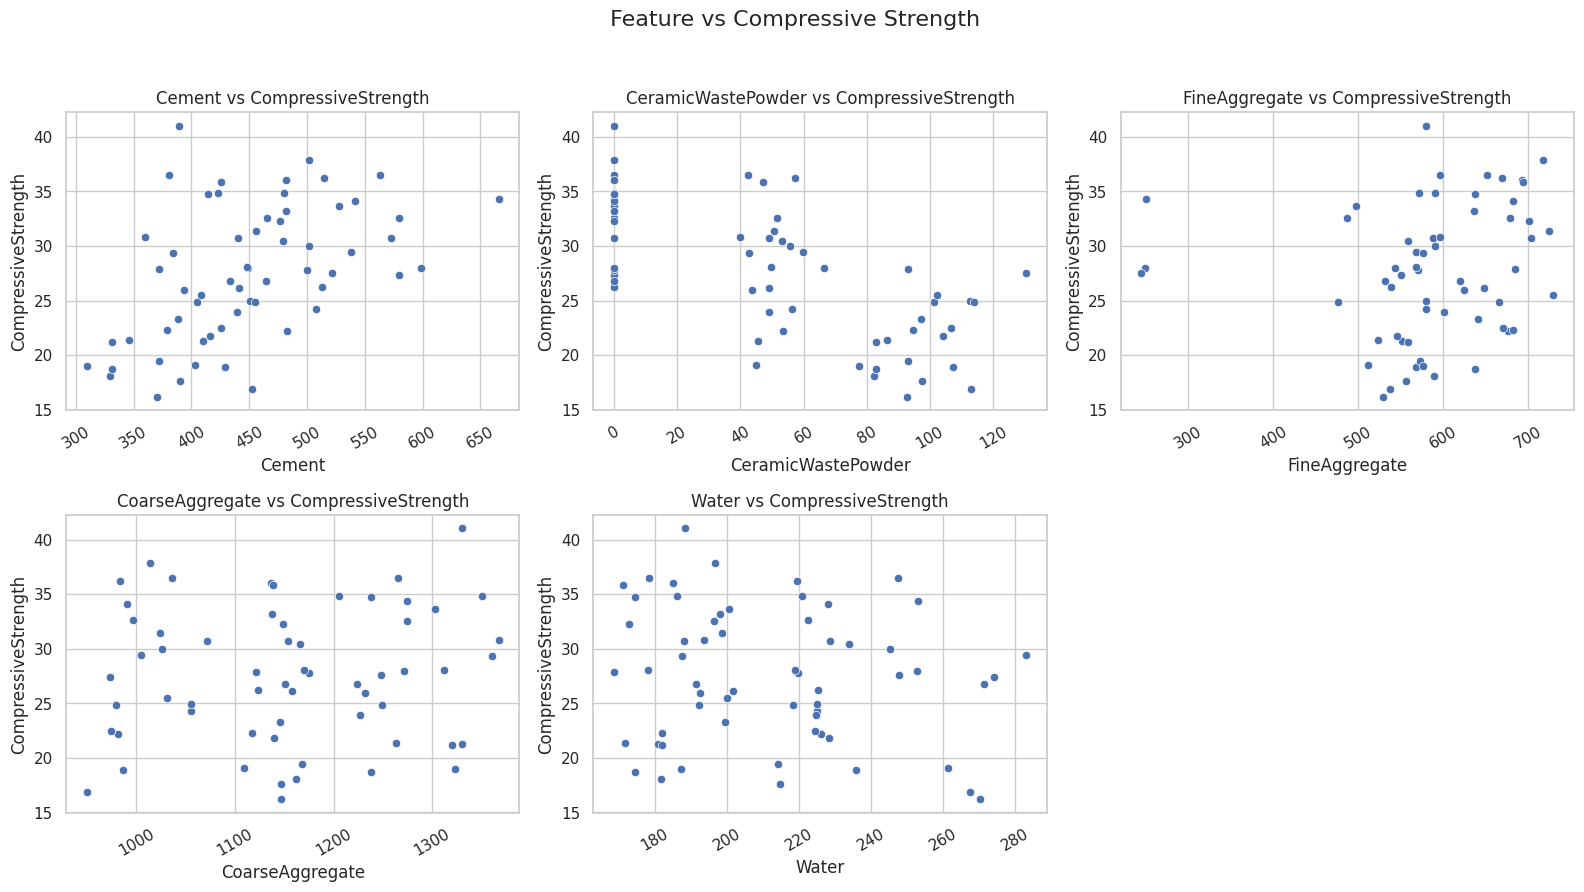

In [14]:
# 3. Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Missing values
print("\n Missing Values:\n")
print(df.isnull().sum())

# 2. Summary statistics
print("\n Summary Statistics:\n")
print(df.describe())

# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='YlGnBu', cbar=True, linewidths=0.5, square=True)
plt.title(" Feature Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Feature vs Target Scatter Plots (cleaner than pairplot)
target = 'CompressiveStrength'
features = df.columns.drop(target)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.scatterplot(x=col, y=target, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs {target}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=30)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(" Feature vs Compressive Strength", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [7]:
# 4. Feature & Target Split
X = df.drop('CompressiveStrength', axis=1)
y = df['CompressiveStrength']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(" Data split complete.")


 Data split complete.


In [9]:
# 6. Model Training & Evaluation

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    print(f" {name} - R2: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")

# Convert to DataFrame
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
print("\n Model Performance Summary:\n", results_df)


 Linear Regression - R2: 0.753, RMSE: 2.842, MAE: 2.436
 Decision Tree - R2: 0.521, RMSE: 3.953, MAE: 3.124
 Random Forest - R2: 0.605, RMSE: 3.592, MAE: 2.888
 AdaBoost - R2: 0.524, RMSE: 3.940, MAE: 3.306
 Support Vector Regressor - R2: -0.271, RMSE: 6.439, MAE: 5.561

 Model Performance Summary:
                               RMSE       MAE        R2
Linear Regression         2.841519  2.436421  0.752526
Random Forest             3.592162  2.887517  0.604505
AdaBoost                  3.939714  3.306142  0.524272
Decision Tree             3.952867  3.124167  0.521090
Support Vector Regressor  6.439365  5.561360 -0.270912


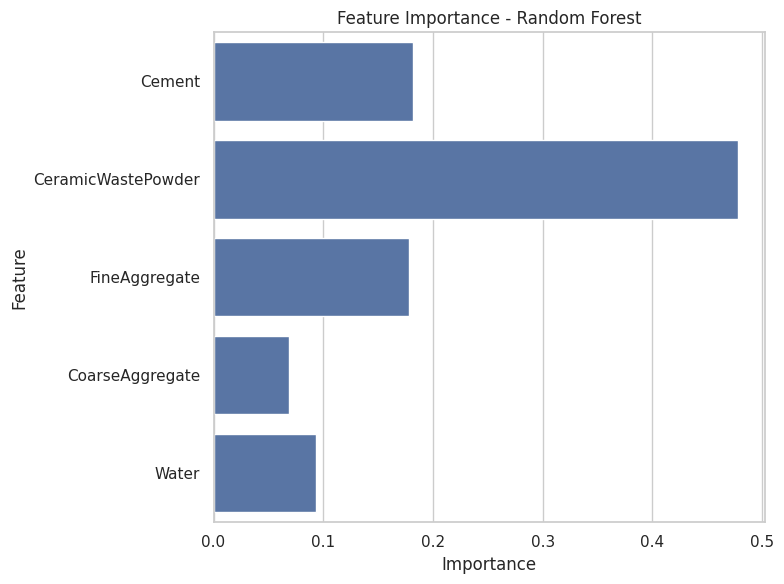

In [10]:
# 7. Feature Importance (Random Forest Example)

rf_model = models['Random Forest']
importances = rf_model.feature_importances_

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

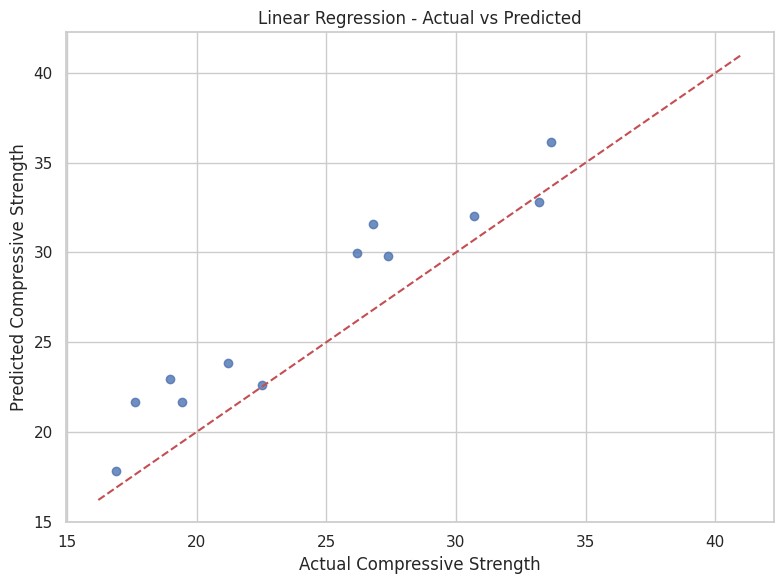

In [11]:
# 8. Actual vs Predicted Visualization

best_model_name = results_df.index[0]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.8)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title(f"{best_model_name} - Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.tight_layout()
plt.show()


In [12]:
# 9. Cross Validation Scores

print("\n 5-Fold Cross-Validation R² Scores:")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name}: R2 = {scores.mean():.3f} ± {scores.std():.3f}")


 5-Fold Cross-Validation R² Scores:
Linear Regression: R2 = -0.107 ± 0.475
Decision Tree: R2 = -0.725 ± 0.981
Random Forest: R2 = -0.032 ± 0.400
AdaBoost: R2 = -0.413 ± 0.878
Support Vector Regressor: R2 = -1.844 ± 2.413
